<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

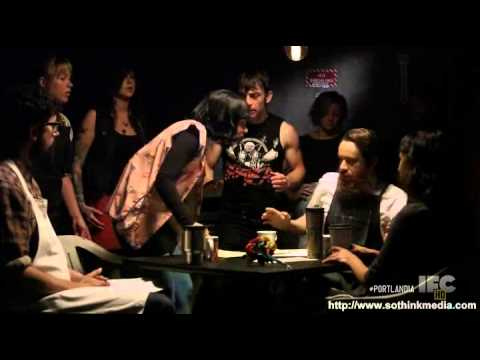

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/axel/Desktop/LambdaSchool/Sprint 4 - DS - Machine Learning/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [82]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [83]:
STOP_WORDS = nlp.Defaults.stop_words.union([" ", 'coffee','place','good'])

In [84]:
tokens = []
for doc in tokenizer.pipe(shops["full_review_text"], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [85]:
shops['tokens'].head()

0    [11/25/2016, 1, check-in, love, love, loved, a...
1    [12/2/2016, listed, date, night:, austin,, amb...
2    [11/30/2016, 1, check-in, listed, brunch, spot...
3    [11/25/2016, cool, decor!, drinks, nice, seati...
4    [12/3/2016, 1, check-in, located, northcross, ...
Name: tokens, dtype: object

In [131]:
import re
def get_lemmas(text):

    lemmas = []
    del text[0]
    text = " ".join(text)
    re.sub('[^a-zA-Z 0-9]', '', text)
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [91]:
shops['lemmas'] = shops['tokens'].apply(get_lemmas)

In [92]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[check-in, love, love, loved, atmosphere!, cor...","[love, love, atmosphere, corner, shop, style, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[date, night:, austin,, ambiance, austin, beau...","[date, night, austin, ambiance, austin, beauti..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[check-in, listed, brunch, spots, loved, eclec...","[brunch, spot, eclectic, homey, plush, decor, ..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[decor!, drinks, nice, seating, however..., ov...","[decor, nice, seating, $, 1.50, extra, 3, ounc..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[check-in, located, northcross, mall, shopping...","[northcross, mall, shopping, center, east, bur..."


In [12]:
from collections import Counter

In [13]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [14]:
wc = count(shops['lemmas'])

In [15]:
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
120,great,2860,3959,1.0,0.011395,0.011395,0.375525
37,check,3169,3459,2.0,0.009956,0.021351,0.416098
137,like,2280,3390,3.0,0.009757,0.031109,0.299370
114,coffee,2083,2702,4.0,0.007777,0.038886,0.273503
395,come,1935,2641,5.0,0.007602,0.046487,0.254070
208,good,2035,2523,6.0,0.007262,0.053749,0.267201
11,love,1816,2378,7.0,0.006845,0.060594,0.238445
472,time,1750,2352,8.0,0.006770,0.067364,0.229779
42,austin,1838,2341,9.0,0.006738,0.074102,0.241334
34,drink,1635,2332,10.0,0.006712,0.080814,0.214680


In [16]:
import squarify
import matplotlib.pyplot as plt

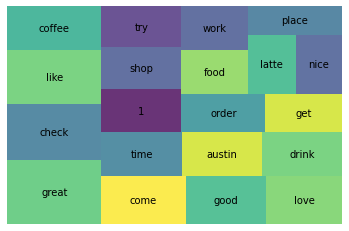

In [17]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [26]:
import seaborn as sns

In [74]:
good_condition = shops['star_rating'].str[0:4].astype(float) >= 4.0
bad_condition = shops['star_rating'].str[0:4].astype(float) <= 3.0
good_shops = shops[good_condition]
bad_shops = shops[bad_condition]

In [75]:
wc_good = count(good_shops['lemmas'])
wc_bad = count(bad_shops['lemmas'])

In [52]:
wc_good['appears_in_pct'].describe()

count    13107.000000
mean         0.002916
std          0.014028
min          0.000163
25%          0.000163
50%          0.000326
75%          0.000977
max          0.436482
Name: appears_in_pct, dtype: float64

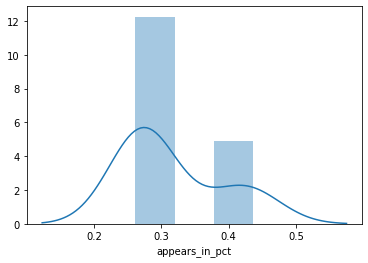

In [79]:
# Frequency of appears in documents
wc_good_freq = wc_good[wc_good['appears_in_pct'] >= 0.26]
sns.distplot(wc_good_freq['appears_in_pct']);

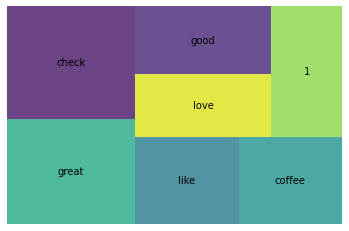

In [138]:
squarify.plot(sizes=wc_good_freq['appears_in_pct'], label=wc_good_freq['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [93]:
wc_bad['appears_in_pct'].describe()

count    7103.000000
mean        0.006085
std         0.019824
min         0.000678
25%         0.000678
50%         0.001355
75%         0.003388
max         0.403794
Name: appears_in_pct, dtype: float64

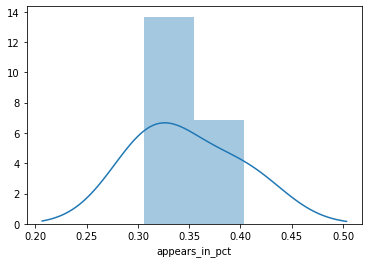

In [159]:
wc_bad_freq = wc_bad[wc_bad['appears_in_pct'] >= 0.30]
sns.distplot(wc_bad_freq['appears_in_pct']);

In [153]:
wc_bad_freq.shape

(3, 7)

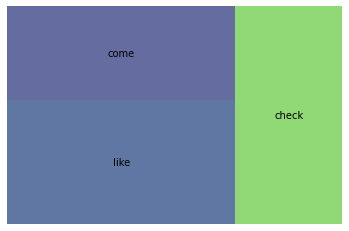

In [154]:
squarify.plot(sizes=wc_bad_freq['appears_in_pct'], label=wc_bad_freq['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

